In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
#plt.style.use('ggplot')
plt.style.use('seaborn')
#plt.style.use('fivethirtyeight')

# **Casos diarios**: Data product 5.

In [2]:
df = pd.read_csv('TotalesNacionales.csv').transpose()
df = df.rename(columns={i: df.loc['Fecha', i] for i in range(19)})
df = df.drop(index=['Fecha'])
df.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in df.index]
df.tail(10)

,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos nuevos confirmados por antigeno
2021-06-07,4459,1.43488e+06,NaN,30058,48596,1842,6958,99623,48596,1.35623e+06,1.3052e+06,1.35522e+06,48596,276850,13049,657,41472,1183,628
2021-06-08,3863,1.44042e+06,NaN,30104,46874,1284,5568,100996,46874,1.36344e+06,1.30932e+06,1.36243e+06,46874,277375,11995,421,42063,1192,627
2021-06-09,4196,1.44577e+06,NaN,30141,44757,837,5369,101152,44757,1.37087e+06,1.31448e+06,1.36986e+06,44757,279942,13113,336,43117,1201,1072
2021-06-10,5396,1.45348e+06,NaN,30339,45774,1735,7716,100755,45774,1.37736e+06,1.32238e+06,1.37634e+06,45774,282369,13911,585,44042,1211,935
2021-06-11,5413,1.46142e+06,NaN,30472,47777,2017,7972,100038,47777,1.38317e+06,1.33091e+06,1.38212e+06,47777,284342,14349,542,44951,1225,940
2021-06-12,5143,1.46899e+06,NaN,30579,46337,1953,7624,99236,46337,1.39208e+06,1.33918e+06,1.39102e+06,46337,286303,14215,528,45810,1237,911
2021-06-13,4984,1.47647e+06,NaN,30707,45506,1951,7529,98966,45506,1.40026e+06,1.3468e+06,1.39919e+06,45506,288034,13990,594,46587,1244,824
2021-06-14,4012,1.48266e+06,NaN,30804,44217,1691,6234,98317,44217,1.40764e+06,1.35354e+06,1.40656e+06,44217,288622,12795,531,47154,1258,613
2021-06-15,3213,1.48724e+06,NaN,30865,41868,1098,4607,97882,41868,1.41451e+06,1.35849e+06,1.41341e+06,41868,289261,11809,296,47688,1263,564
2021-06-16,3574,1.49156e+06,NaN,30922,39176,574,4347,96588,39176,1.42146e+06,1.36405e+06,1.42036e+06,39176,291867,12681,199,48598,1268,937


In [3]:
# Se agrega casos diarios
df['Casos diarios'] = df['Casos totales'].diff(periods=1)

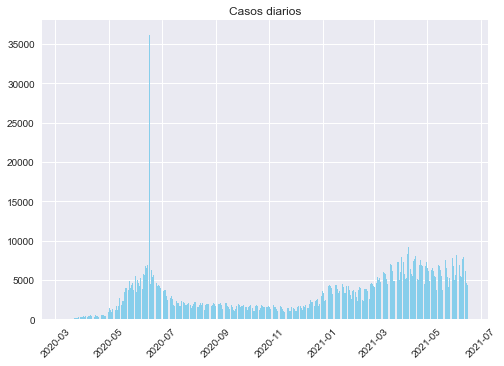

In [4]:
plt.bar(df.index[7:], df['Casos diarios'][7:], color='skyblue')
plt.xticks(rotation=45)
plt.title('Casos diarios')
plt.show()

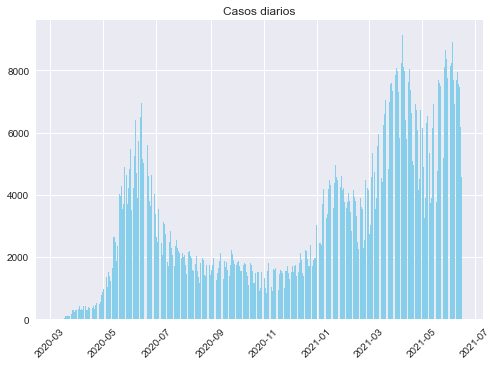

In [5]:
# El '2020-06-17' hay un número muy grande de casos. Parece que ese día agregaron datos que las 
# autoridades no estaban informando. Se decide por eliminar ese día para que la curva quede parecida
# a la curva "oficial".
df = df.drop(index=[datetime.datetime(2020, 6, 17)])

plt.bar(df.index[7:], df['Casos diarios'][7:], color='skyblue')
plt.xticks(rotation=45)
plt.title('Casos diarios')
plt.show()

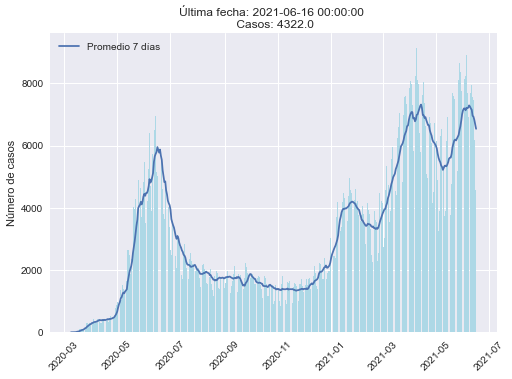

In [23]:
# Se agrega columna promedio 7 días para casos diarios.
n = 7
df['Casos diarios promedio {} días'.format(n)] = df['Casos diarios'].rolling(window=n).mean()

plt.bar(df.index[7:], df['Casos diarios'][7:], color='lightblue')
plt.plot(df.index[7:], df['Casos diarios promedio 7 días'][7:].values, label='Promedio 7 días')
plt.xticks(rotation=45)
plt.title('Última fecha: {} \n Casos: {}'. format(df.index[-1], df['Casos diarios'][-1]))
plt.ylabel('Número de casos')
plt.legend()
plt.show()

# **Pacientes COVID-19 en UCI por grupo de edad**: Data product 9

In [7]:
edad = pd.read_csv('HospitalizadosUCIEtario_T.csv')
edad.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in edad['Grupo de edad']]
edad.drop(columns=['Grupo de edad'], inplace=True)
edad.tail(10)

,<=39,40-49,50-59,60-69,>=70
2021-06-07,723,639,722,642,439
2021-06-08,741,644,728,644,435
2021-06-09,720,642,734,660,439
2021-06-10,743,637,725,670,453
2021-06-11,737,621,731,679,450
2021-06-12,717,609,740,675,457
2021-06-13,704,614,747,679,457
2021-06-14,685,610,758,666,468
2021-06-15,678,598,747,685,479
2021-06-16,689,593,745,710,489


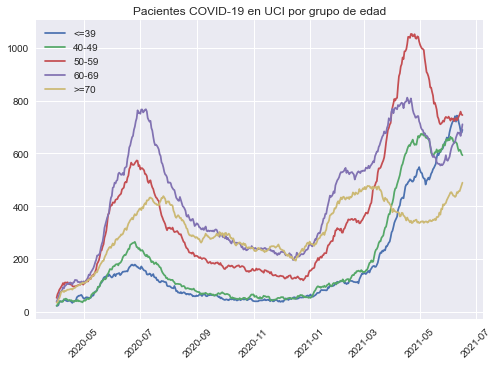

In [8]:
for grupo in edad.columns:
    plt.plot(edad.index, edad[grupo], label=grupo)

plt.title('Pacientes COVID-19 en UCI por grupo de edad')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# **DP10 - Fallecidos con COVID-19 por grupo de edad: Descripción**: Data product 10

In [9]:
fallecidos_etario = pd.read_csv('FallecidosEtario_T.csv')
fallecidos_etario.tail(10)

,Grupo de edad,<=39,40-49,50-59,60-69,70-79,80-89,>=90
424,2021-06-07,770,1234,3290,6234,8207,7508,2815
425,2021-06-08,770,1238,3293,6239,8222,7523,2819
426,2021-06-09,775,1239,3298,6249,8229,7528,2823
427,2021-06-10,782,1250,3315,6285,8292,7569,2846
428,2021-06-11,783,1256,3331,6311,8328,7607,2856
429,2021-06-12,789,1268,3345,6332,8354,7625,2866
430,2021-06-13,799,1280,3360,6355,8382,7648,2883
431,2021-06-14,803,1289,3372,6376,8410,7666,2888
432,2021-06-15,808,1290,3377,6389,8424,7685,2892
433,2021-06-16,810,1292,3385,6401,8438,7702,2894


In [10]:
# Poner fechas como index.
fallecidos_etario.index = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in fallecidos_etario['Grupo de edad']]
fallecidos_etario.drop(columns=['Grupo de edad'], inplace=True)

# "Derivar" para encontrar los casos diarios desde los acumulados.
fallecidos_etario = fallecidos_etario.diff(periods=1)

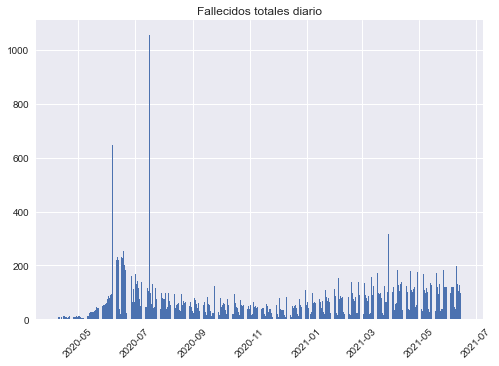

In [11]:
# Número total de fallecidos por día.
plt.bar(fallecidos_etario.sum(axis=1).index, fallecidos_etario.sum(axis=1).values)
plt.title('Fallecidos totales diario')
plt.xticks(rotation=45)
plt.show()

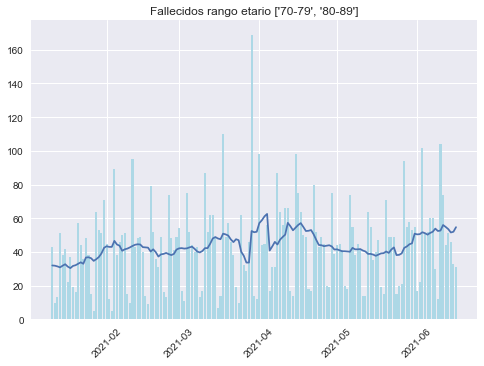

In [16]:
# Rangos: <=39 	40-49 	50-59 	60-69 	70-79 	80-89 	>=90
start_date = datetime.datetime(2021, 1, 4)
rangos = ['70-79', '80-89']

since_start_date = fallecidos_etario[rangos][fallecidos_etario.index >= start_date]
plt.bar(since_start_date.index[7:], since_start_date.sum(axis=1)[7:], color='lightblue')
plt.plot(since_start_date.index[7:], since_start_date.sum(axis=1).rolling(window=7).mean()[7:])
plt.xticks(rotation=45)
plt.title('Fallecidos rango etario {}'.format(rangos))
plt.show()